# Business Company Applicants Project

My goal for this project analyze and visualize a dataset of applicants for a business company. The data contains the applicants' gender, high school graduation percentage, college graduation percentage, college major, work experience, applicant status, and salary if the applicant's status is 'Placed.' Some things I want to figure out is the difference between male and female applicants, distribution of applicants' secondary school and high school regions, how well the average applicant did in secondary school, high school, and college, which career field is the most prevalent, which factor influenced a candidate in getting placed, whether or not percentage matters for an applicant to get placed, and which degree specialization is much demanded by corporate.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## View Data

In [14]:
placement = pd.read_csv('Business_applicants.csv')

In [15]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [16]:
placement.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


## Exploratory Data Analysis

I will rename some of the variables to be clearer.

In [17]:
placement.columns = ['id', 'sex', 'secondary_school_grade', 'secondary_school_branch', 'high_school_grade',
                     'high_school_branch', 'high_school_field', 'degree_grade', 'degree_field', 'work_experience',
                     'application_test_grade', 'specialization', 'mba_grade', 'status', 'salary']

In [18]:
placement.head()

,id,sex,secondary_school_grade,secondary_school_branch,high_school_grade,high_school_branch,high_school_field,degree_grade,degree_field,work_experience,application_test_grade,specialization,mba_grade,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Working from left to right, I will first compare the number of male applicants to the number of female applicants to get an idea of how this business presents itself to either sex.

In [6]:
placement['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

It seems more men applied to this business than women. Maybe men have the preferred experience or skills of this company.

In [22]:
placement['high_school_field'].value_counts()

Commerce    113
Science      91
Arts         11
Name: high_school_field, dtype: int64

Most applicants graduated high school with a major in either commerce or science.

In [24]:
placement['degree_field'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_field, dtype: int64

Similar to high school, most applicants graduated college with a major in either communication and management or science and technology.

In [26]:
placement['specialization'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialization, dtype: int64

Continuing with the trend of high school and college, all applicants are specialized in marketing, with some also specializing in finance or human resources.

In [11]:
placement['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Out of 215 total applicants, 148 have been placed. This makes the business's acceptance rate about 69%, which is not too competitive.

I created a new dataframe that only contains applicants that have been placed to see what they have in common.

In [27]:
placed = placement[placement['status'] == 'Placed']
placed

,id,sex,secondary_school_grade,secondary_school_branch,high_school_grade,high_school_branch,high_school_field,degree_grade,degree_field,work_experience,application_test_grade,specialization,mba_grade,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [28]:
placed['degree_field'].value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_field, dtype: int64

<AxesSubplot:xlabel='degree_field', ylabel='count'>

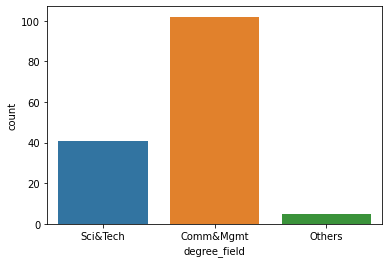

In [30]:
sns.countplot(data = placed, x = placed['degree_field'])

Corporate seems to favor applicants with a degree in Communications and Management, which make up about 69% of placed applicants, as well as Science and Technology, which make up about 28% of placed applicants.

In [31]:
placed.corr()

,id,secondary_school_grade,high_school_grade,degree_grade,application_test_grade,mba_grade,salary
id,1.000000,-0.093480,-0.218428,-0.102250,0.041467,-0.072432,0.063764
secondary_school_grade,-0.093480,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
high_school_grade,-0.218428,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_grade,-0.102250,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
application_test_grade,0.041467,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_grade,-0.072432,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


<AxesSubplot:>

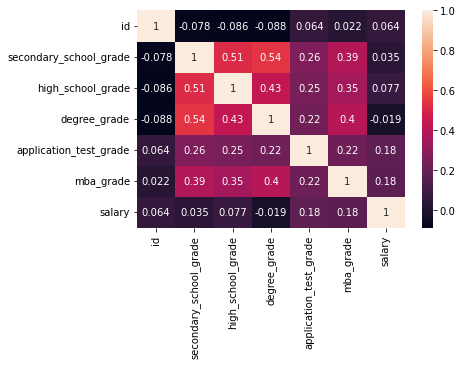

In [32]:
sns.heatmap(placement.corr(), annot = True)

By examining the correlation table and heatmap above, there seems to be a possible link between a placed applicant's MBA degree percentage and college degree percentage. Generally, this company seems to hire applicants who graduated both college and business school with a good grade or percentage. The correlation table and heat map show that some percentages matter more than others. For instance, this heatmap shows that a graduating high school grade or percentage does not have as much of an impact compared to college or business school.